In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
phantom_length = 40 # cm
unit_length = phantom_length/1000 # cm
phantom_volume = np.pi * (15)**2 * (20)
unit_volume = phantom_volume/1000

p_water = 1 # gcm^-3
p_al = 2.7 # gcm^-3

In [47]:
doses = np.mean([np.genfromtxt(f'./outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,5)], axis=0)


In [49]:
doses = np.array([np.genfromtxt(f'./outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,5)])
bragg_peaks = np.array([
    unit_length * np.argmax(doses, axis=1)
])

40 - np.mean(bragg_peaks), np.std(bragg_peaks) # +/- 0.04 cm

(28.16, 0.0)

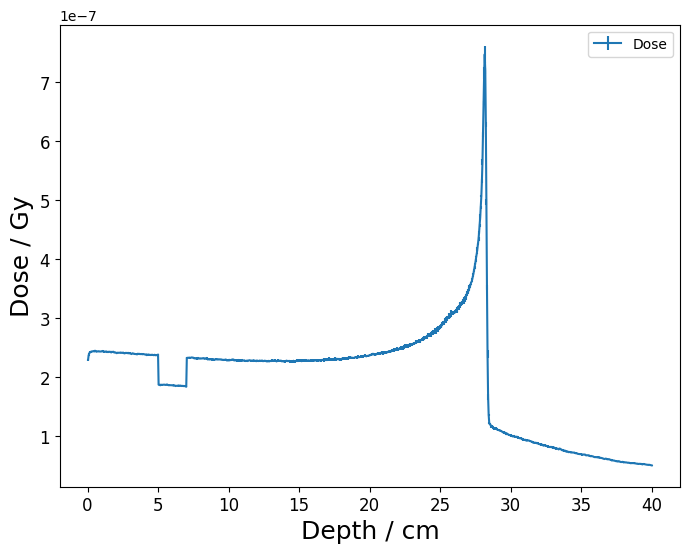

In [50]:
plt.figure(figsize=(8,6))

plt.errorbar(
    [40 - unit_length*i for i in range(1000)],
    np.mean(doses, axis=0),
    yerr=np.std(doses, axis=0),
    label="Dose"
)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Depth / cm", fontsize=18)
plt.ylabel("Dose / Gy", fontsize=18)
plt.legend()

plt.savefig("./plots/Dose_Depth_ex3_4.png", dpi=300)

In [51]:
# AL plate - 25 cm to 27 cm
# pos 
al_plate_pos = np.arange((25/40)*1000, (27/40)*1000 + 1, dtype=int)
not_plate = np.delete(np.arange(0, 1000, dtype=int), al_plate_pos)

In [52]:
dose = np.mean(doses, axis=0)
dose_unc = np.std(doses, axis=0)

stopping_powers_al = dose[al_plate_pos] * p_al * unit_volume / unit_length # J cm^-1
stopping_powers_al_unc = dose_unc[al_plate_pos] * p_al * unit_volume / unit_length # J cm^-1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00021713739816639274 4.979594968576848e-07


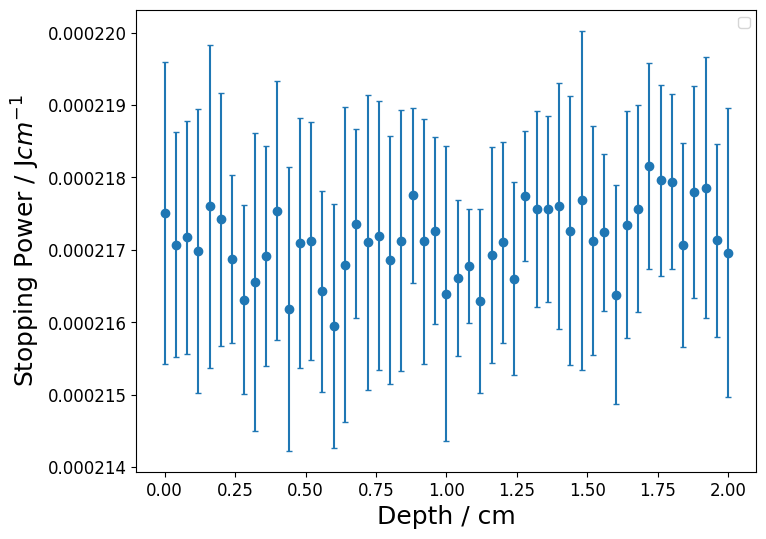

In [67]:
plt.figure(figsize=(8,6))

plt.errorbar(
    unit_length*np.arange(0,51),
    stopping_powers_al,
    yerr=stopping_powers_al_unc,
    ls="none",
    marker="o",
    capsize=2
)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.xlabel("Depth / cm", fontsize=18)
plt.ylabel(r"Stopping Power / J$cm^{-1}$", fontsize=18)
plt.legend()

plt.savefig("./plots/depth_sp.png", dpi=300)
# Stopping power values

SP_mean = np.mean(stopping_powers_al)
SP_unc = np.std(stopping_powers_al)
print(SP_mean, SP_unc)

In [55]:
water_doses = np.mean([np.genfromtxt(f'../ex3_2/part_b/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,11)], axis=0)
water_doses_unc = np.std([np.genfromtxt(f'../ex3_2/part_b/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,11)], axis=0)

In [60]:
SP_water = np.mean(water_doses[al_plate_pos] * p_water * unit_volume / unit_length)
SP_water_unc = water_doses_unc[al_plate_pos] * p_water * unit_volume / unit_length

In [65]:
# SPR approximation
t_m = 2 #cm
WET = t_m * (p_al/p_water) * (SP_mean / SP_water)
print(f"The water equivalent thickness of the 2cm Pb plate with C6+ ions is: {WET} cm")

The water equivalent thickness of the 2cm Pb plate with C6+ ions is: 3330.3037982820942 cm
